# Temperature Forecast Project

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('temperature_prediction.csv')

In [4]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [6]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns.

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# DataFrame description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

It is a regression problem with two target variables 'Next_Tmax' and 'Next_Tmin'

# Checking null values

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are 2 null values in 'station'column,2 null values in 'date'column,70 null values in'Present_Tmax','Present_Tmin',75 null values in 'LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4 ','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4' and 27 null values in 'Next_Tmax'and'Next_Tmin'respectively. 

# HeatMap forthe representataion of null values

<AxesSubplot:>

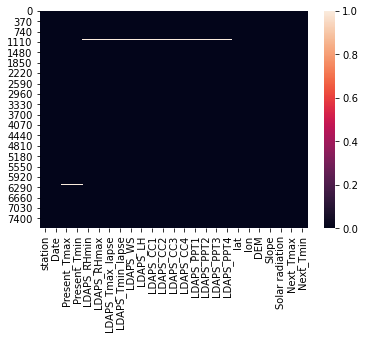

In [9]:
sns.heatmap(df.isnull())

the heatmap also shows the presence of nullvalues.

# Checking the data types of the columns

In [11]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [14]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


# Skewness

In [16]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

Threshold value is taken as +/-0.65 and columns having skewness are 'LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM'and'Slope'

# Graphical representation of skewness

<AxesSubplot:ylabel='Frequency'>

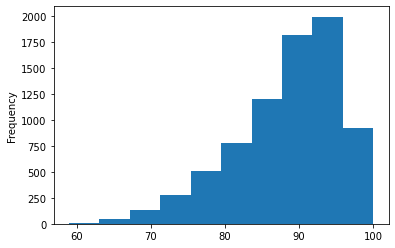

In [17]:
df['LDAPS_RHmax'].plot.hist()

skewness is above our threshold value of=/-0.65 

<AxesSubplot:ylabel='Frequency'>

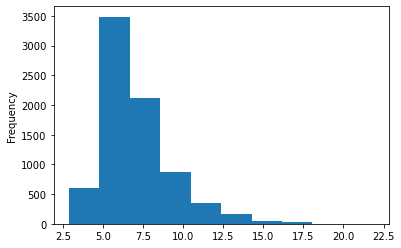

In [18]:
df['LDAPS_WS'].plot.hist()

skewness is above our threshold value of=/-0.65 

<AxesSubplot:ylabel='Frequency'>

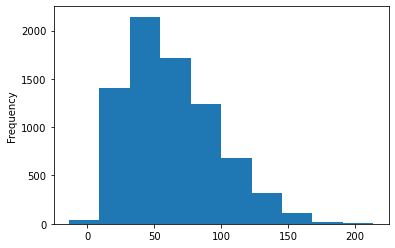

In [19]:
df['LDAPS_LH'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

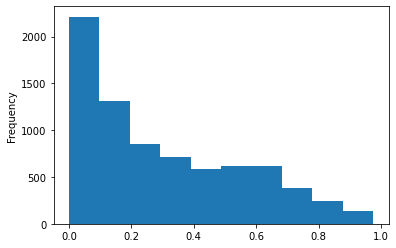

In [20]:
df['LDAPS_CC4'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

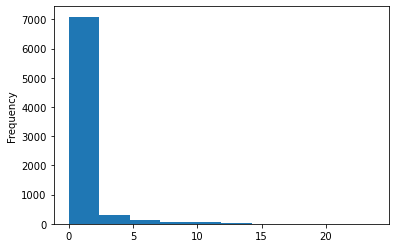

In [21]:
df['LDAPS_PPT1'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

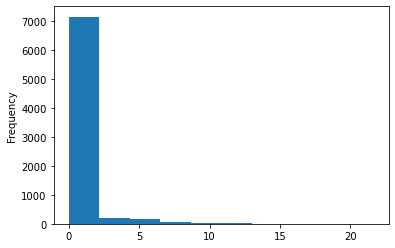

In [22]:
df['LDAPS_PPT2'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

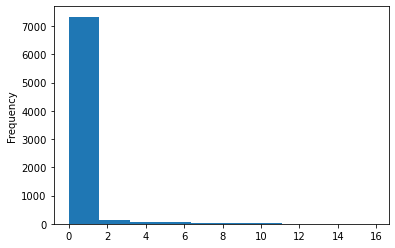

In [23]:
df['LDAPS_PPT3'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

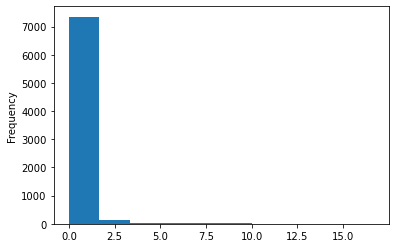

In [24]:
df['LDAPS_PPT4'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

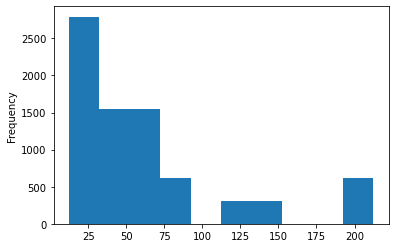

In [25]:
df['DEM'].plot.hist()

skewness is above our threshold value of=/-0.65

<AxesSubplot:ylabel='Frequency'>

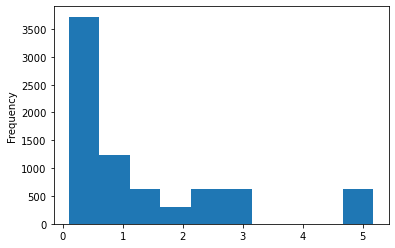

In [26]:
df['Slope'].plot.hist()

skewness is above our threshold value of=/-0.65

# Normal Distribution Curve:

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

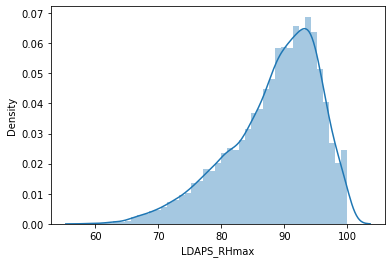

In [28]:
sns.distplot(df['LDAPS_RHmax'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

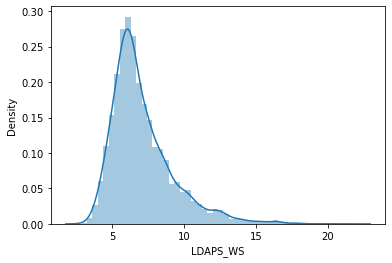

In [29]:
sns.distplot(df['LDAPS_WS'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

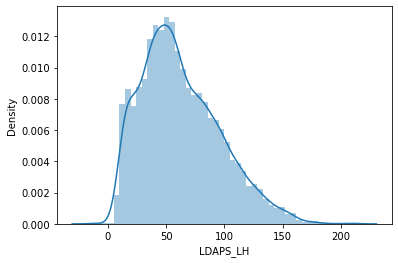

In [30]:
sns.distplot(df['LDAPS_LH'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

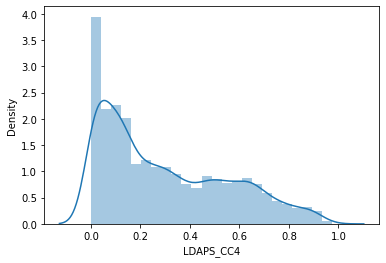

In [32]:
sns.distplot(df['LDAPS_CC4'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

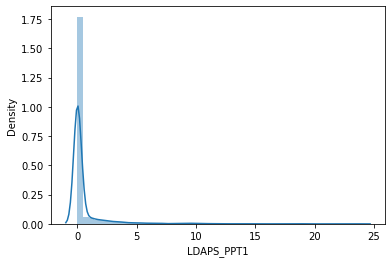

In [33]:
sns.distplot(df['LDAPS_PPT1'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

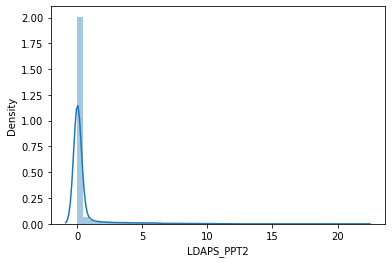

In [34]:
sns.distplot(df['LDAPS_PPT2'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

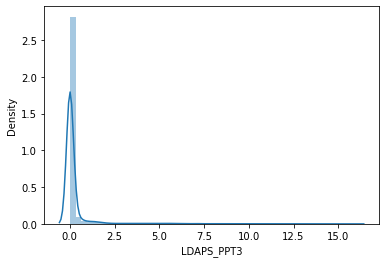

In [35]:
sns.distplot(df['LDAPS_PPT3'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

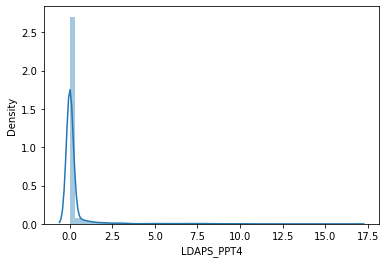

In [36]:
sns.distplot(df['LDAPS_PPT4'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEM', ylabel='Density'>

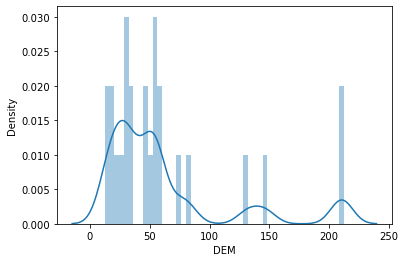

In [37]:
sns.distplot(df['DEM'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Slope', ylabel='Density'>

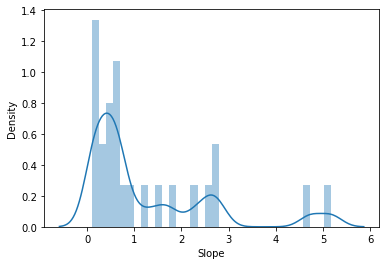

In [39]:
sns.distplot(df['Slope'])

we can see that data is not normally distributed in this column as the buiding blocks are outside the graph

Removal of skewness

In [40]:
from scipy.stats import boxcox
#0--->log transform
#.5--->square root transform
df['LDAPS_RHmax']=boxcox(df['LDAPS_RHmax'],0)

<AxesSubplot:ylabel='Frequency'>

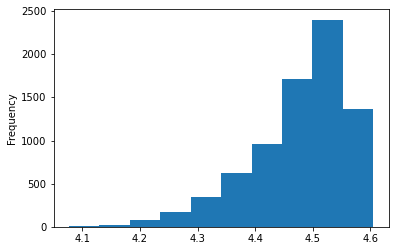

In [41]:
df['LDAPS_RHmax'].plot.hist()

In [42]:
df['LDAPS_WS']=boxcox(df['LDAPS_WS'],0)

<AxesSubplot:ylabel='Frequency'>

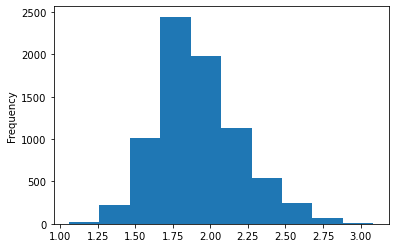

In [43]:
df['LDAPS_WS'].plot.hist()

In [44]:
df['LDAPS_LH']=boxcox(df['LDAPS_LH'],0)

ValueError: Data must be positive.

Skewness cannot be removed as data must be positive

In [45]:
df['LDAPS_CC4']=boxcox(df['LDAPS_CC4'],0)

ValueError: Data must be positive.

Skewness cannot be removed as data must be positive

In [46]:
df['LDAPS_PPT1']=boxcox(df['LDAPS_PPT1'],0)

ValueError: Data must be positive.

In [47]:
df['LDAPS_PPT2']=boxcox(df['LDAPS_PPT2'],0)

ValueError: Data must be positive.

In [48]:
df['LDAPS_PPT3']=boxcox(df['LDAPS_PPT3'],0)

ValueError: Data must be positive.

In [49]:
df['LDAPS_PPT4']=boxcox(df['LDAPS_PPT4'],0)

ValueError: Data must be positive.

In [50]:
df['DEM']=boxcox(df['DEM'],0)

<AxesSubplot:ylabel='Frequency'>

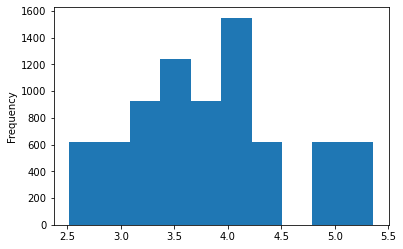

In [51]:
df['DEM'].plot.hist()

In [52]:
df['Slope']=boxcox(df['Slope'],0)

<AxesSubplot:ylabel='Frequency'>

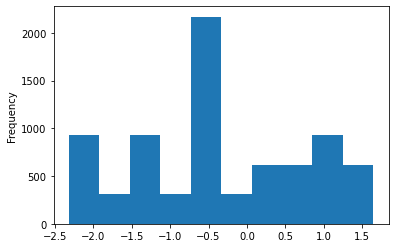

In [53]:
df['Slope'].plot.hist()

# Outliers

Checking the presence of outliers using boxplot 

station                AxesSubplot(0.125,0.125;0.0270979x0.755)
Present_Tmax        AxesSubplot(0.157517,0.125;0.0270979x0.755)
Present_Tmin        AxesSubplot(0.190035,0.125;0.0270979x0.755)
LDAPS_RHmin         AxesSubplot(0.222552,0.125;0.0270979x0.755)
LDAPS_RHmax          AxesSubplot(0.25507,0.125;0.0270979x0.755)
LDAPS_Tmax_lapse    AxesSubplot(0.287587,0.125;0.0270979x0.755)
LDAPS_Tmin_lapse    AxesSubplot(0.320105,0.125;0.0270979x0.755)
LDAPS_WS            AxesSubplot(0.352622,0.125;0.0270979x0.755)
LDAPS_LH             AxesSubplot(0.38514,0.125;0.0270979x0.755)
LDAPS_CC1           AxesSubplot(0.417657,0.125;0.0270979x0.755)
LDAPS_CC2           AxesSubplot(0.450175,0.125;0.0270979x0.755)
LDAPS_CC3           AxesSubplot(0.482692,0.125;0.0270979x0.755)
LDAPS_CC4            AxesSubplot(0.51521,0.125;0.0270979x0.755)
LDAPS_PPT1          AxesSubplot(0.547727,0.125;0.0270979x0.755)
LDAPS_PPT2          AxesSubplot(0.580245,0.125;0.0270979x0.755)
LDAPS_PPT3          AxesSubplot(0.612762

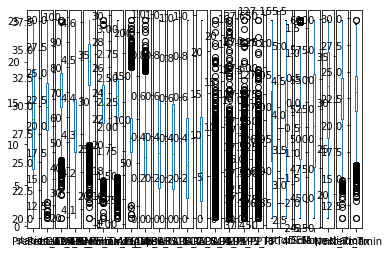

In [58]:
df.plot(kind='box',subplots=True,layout=(1,24))

Removal of outliers

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

TypeError: can only concatenate str (not "float") to str